In [1]:
# payload = {

# # 模型设置
# "override_settings":{
#       "sd_model_checkpoint": "v1-5-pruned.ckpt",
#       "sd_vae": "animevae.pt",
#       "CLIP_stop_at_last_layers": 2,
# },

# # 基本参数 
#   "prompt": "",
#   "negative_prompt": "",
#   "styles": [
#     "string"
#   ],
#   "seed": -1,
#   "subseed": -1,
#   "subseed_strength": 0,
#   "seed_resize_from_h": -1,
#   "seed_resize_from_w": -1,
#   "sampler_name": "string",
#   "scheduler": "string",
#   "batch_size": 1,
#   "n_iter": 1,
#   "steps": 50,
#   "cfg_scale": 7,
#   "width": 512,
#   "height": 512,
#   "restore_faces": true,
#   "tiling": true,
#   "do_not_save_samples": false,
#   "do_not_save_grid": false,
#   "eta": 0,
#   "denoising_strength": 0,
#   "s_min_uncond": 0,
#   "s_churn": 0,
#   "s_tmax": 0,
#   "s_tmin": 0,
#   "s_noise": 0,
#   "override_settings": {},
#   "override_settings_restore_afterwards": true,
#   "refiner_checkpoint": "string",
#   "refiner_switch_at": 0,
#   "disable_extra_networks": false,
#   "firstpass_image": "string",
#   "comments": {},
#   "enable_hr": false,
#   "firstphase_width": 0,
#   "firstphase_height": 0,
#   "hr_scale": 2,
#   "hr_upscaler": "string",
#   "hr_second_pass_steps": 0,
#   "hr_resize_x": 0,
#   "hr_resize_y": 0,
#   "hr_checkpoint_name": "string",
#   "hr_sampler_name": "string",
#   "hr_scheduler": "string",
#   "hr_prompt": "",
#   "hr_negative_prompt": "",
#   "force_task_id": "string",
#   "sampler_index": "Euler",
#   "script_name": "string",
#   "script_args": [],
#   "send_images": true,
#   "save_images": false,
#   "alwayson_scripts": {},
#   "infotext": "string"

# # 高清修复 highres fix
# "enable_hr": True,
# "denoising_strength": 0.4,
# "hr_scale": 2,
# "hr_upscaler": "Latent",

# }

In [17]:
import base64  
from PIL import Image  
from io import BytesIO  
  
def image_to_base64(image_path):  
    with Image.open(image_path) as image_file:  
        # 将图片读取为字节流  
        encoded_string = BytesIO()  
        image_file.save(encoded_string, format='PNG')  # 或者 'JPEG' 取决于你想要的图片格式  
        # 将字节流转换为Base64编码  
        base64_data = base64.b64encode(encoded_string.getvalue()).decode('utf-8')  
        return base64_data  

In [19]:

def resize_image_maintaining_ratio(image_path, max_size=(720, 720)):  
    """  
    调整图片大小，保持宽高比，使得最长边不超过max_size中的对应值  
    :param image_path: 图片的路径  
    :param max_size: 一个包含两个元素的元组，表示允许的最大宽度和高度（本例中设为相同值，即720x720）  
    :return: 调整大小后的图片尺寸（宽度，高度）  
    """  
    try:  
        img = Image.open(image_path)  
        original_width, original_height = img.size  
        print(f"原始图片尺寸为：{original_width}x{original_height}")  
  
        # 计算缩放比例  
        max_width, max_height = max_size  
        print(f"目标最大尺寸为：{max_width}x{max_height}")  
  
        # 根据原始图片的宽高比和目标最大尺寸，计算新的尺寸  
        if original_width > original_height:  
            # 宽度大于高度，按宽度缩放  
            scale = max_width / float(original_width)  
            new_width = int(round(original_width * scale))  
            new_height = int(round(original_height * scale))  
        else:  
            # 高度大于或等于宽度，按高度缩放  
            scale = max_height / float(original_height)  
            new_width = int(round(original_width * scale))  
            new_height = int(round(original_height * scale))  
  
        # 确保新的宽度和高度不超过目标最大尺寸  
        new_width = min(new_width, max_width)  
        new_height = min(new_height, max_height)  

  
        return new_width, new_height  
    except FileNotFoundError:  
        print(f"图片文件 {image_path} 不存在！")  
    except IOError:  
        print(f"无法打开图片文件 {image_path}！")  
    return None, None  
  
# 使用函数  
base64_string = image_to_base64('test-input.jpg')  
image_size_w, image_size_h = resize_image_maintaining_ratio('test-input.jpg')
print(image_size_h, image_size_w)

原始图片尺寸为：1200x800
目标最大尺寸为：720x720
480 720


In [35]:
import requests
url = "https://u245871-843f-3282e086.westc.gpuhub.com:8443"

def generate_image(image_size_width:int=image_size_w,
                   image_size_height:int=image_size_h,
                   prompt:str="<lora:FT_lora:1>, a kitchen with a stove, sink, and a window in it's center area with a view of the city, Cui Bai, finely detailed features, a digital rendering, modern european ink painting, Kitchen"):

    payload = {
        "override_settings":{
        "sd_model_checkpoint": "xsarchitectural_v11.ckpt [631eea1a0e]",
        },
        
        "prompt": prompt,
        "negative_prompt": "text, word, cropped, low quality, normal quality, username, watermark, signature, blurry, soft, soft line, curved line, sketch, ugly, logo, pixelated, lowres,nsfw",
        "steps": 30,
        "seed": -1,
        "width": image_size_width,
        "height": image_size_height,

        # 高清修复 highres fix
        "enable_hr": True,
        "denoising_strength": 0.7,
        "hr_scale": 2,
        "hr_upscaler": "Latent",
        
        #插件
        "alwayson_scripts": {

            "ControlNet": {
                "args": [
                    {"enabled": True,
                    "input_image": base64_string,
                    "mask": None,
                    "module": "mlsd",
                    "model": "control_v11p_sd15_mlsd [aca30ff0]",
                    "weight": 0.5,
                    "invert_image": False,
                    "rgbbgr_mode": False,
                    "lowvram": False,
                    "processor_res": 512,
                    "threshold_a": 100,
                    "threshold_b": 200,
                    "starting_control_step": 0,
                    "ending_control_step": 0.8,
                    # "guidance": 1,
                    # "guidance_start": 0,
                    # "guidance_end": 1,
                    "guessmode": False
                    }
                ]
            }
        }
    }

    response = requests.post(url=f'{url}/sdapi/v1/txt2img', json=payload)

    r = response.json()
    print(r)
    
    return r

r = generate_image()

{'images': ['iVBORw0KGgoAAAANSUhEUgAABaAAAAPACAIAAABM5kn/AAADgnRFWHRwYXJhbWV0ZXJzADxsb3JhOkZUX2xvcmE6MT4sIGEga2l0Y2hlbiB3aXRoIGEgc3RvdmUsIHNpbmssIGFuZCBhIHdpbmRvdyBpbiBpdCdzIGNlbnRlciBhcmVhIHdpdGggYSB2aWV3IG9mIHRoZSBjaXR5LCBDdWkgQmFpLCBmaW5lbHkgZGV0YWlsZWQgZmVhdHVyZXMsIGEgZGlnaXRhbCByZW5kZXJpbmcsIG1vZGVybiBldXJvcGVhbiBpbmsgcGFpbnRpbmcsIEtpdGNoZW4KTmVnYXRpdmUgcHJvbXB0OiB0ZXh0LCB3b3JkLCBjcm9wcGVkLCBsb3cgcXVhbGl0eSwgbm9ybWFsIHF1YWxpdHksIHVzZXJuYW1lLCB3YXRlcm1hcmssIHNpZ25hdHVyZSwgYmx1cnJ5LCBzb2Z0LCBzb2Z0IGxpbmUsIGN1cnZlZCBsaW5lLCBza2V0Y2gsIHVnbHksIGxvZ28sIHBpeGVsYXRlZCwgbG93cmVzLG5zZncKU3RlcHM6IDMwLCBTYW1wbGVyOiBFdWxlciwgQ0ZHIHNjYWxlOiA3LjAsIFNlZWQ6IDI1MjU0OTc1ODQsIFNpemU6IDcyMHg0ODAsIE1vZGVsIGhhc2g6IDYzMWVlYTFhMGUsIE1vZGVsOiB4c2FyY2hpdGVjdHVyYWxfdjExLCBEZW5vaXNpbmcgc3RyZW5ndGg6IDAuNywgQ29udHJvbE5ldCAwOiAiTW9kdWxlOiBtbHNkLCBNb2RlbDogY29udHJvbF92MTFwX3NkMTVfbWxzZCBbYWNhMzBmZjBdLCBXZWlnaHQ6IDAuNSwgUmVzaXplIE1vZGU6IENyb3AgYW5kIFJlc2l6ZSwgUHJvY2Vzc29yIFJlczogNTEyLCBUaHJlc2hvbGQgQTogMC4xLCBUaHJ

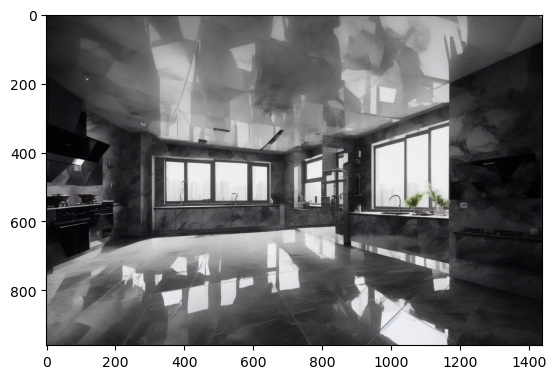

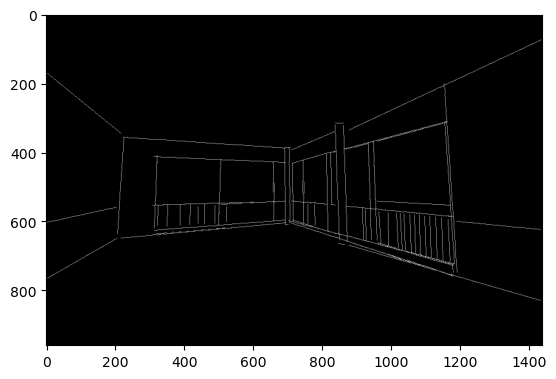

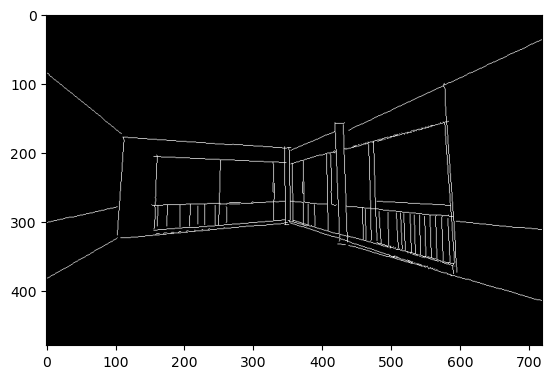

In [36]:
%matplotlib inline
import io
import base64
from PIL import Image
import matplotlib.pyplot as plt 

# r = response.json()
j=0
for i in r['images']:
    image = Image.open(io.BytesIO(base64.b64decode(i.split(",", 1)[0])))
    image.save(f'{j}.png')
    j+=1
    
    plt.imshow(image)
    plt.show()
